In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn.DetectionModel(frozen_model, config_file)

In [4]:
ClassLabels = []
file_name= 'labels.txt'
with open(file_name, 'rt') as fpt:
    ClassLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(ClassLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(ClassLabels))

80


In [7]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001416A519750>

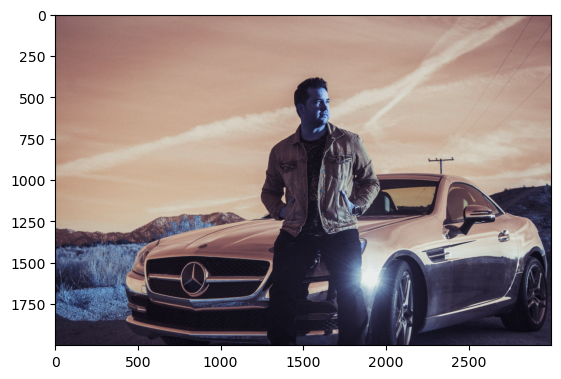

In [8]:
img = cv2.imread('car.jpg')
plt.imshow(img)

In [9]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold = 0.5)

In [10]:
print(ClassIndex)

[1 3]


In [11]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255.0,0), 2)
    cv2.putText(img, ClassLabels[ClassInd - 1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3) 

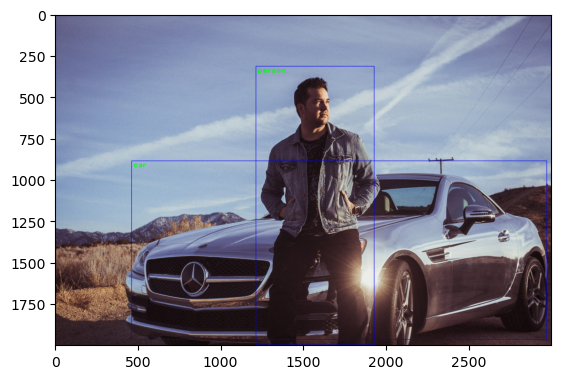

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [27]:
import cv2
import numpy as np
# Assuming model and ClassLabels are already defined

cap = cv2.VideoCapture('city.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("can't find video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Add a timeout mechanism to prevent infinite loops
max_frames = 1000  # Adjust based on your needs
frame_count = 0

try:
    while True and frame_count < max_frames:
        ret, frame = cap.read()
        
        # Check if frame was successfully read
        if not ret:
            print("End of video or error reading frame")
            break
            
        frame_count += 1
        
        # Add error handling for model detection
        try:
            ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.55)
            
            if len(ClassIndex) != 0:
                for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
                    if ClassInd <= 80:
                        cv2.rectangle(frame, (boxes[0], boxes[1]), (boxes[0]+boxes[2], boxes[1]+boxes[3]), (255,0,0), 2)
                        cv2.putText(frame, ClassLabels[ClassInd - 1], (boxes[0]+10, boxes[1]+40), 
                                   font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
        except Exception as e:
            print(f"Error in model detection: {e}")
            
        cv2.imshow("object detection practice project", frame)
        
        # Break loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
except KeyboardInterrupt:
    print("Processing interrupted by user")
finally:
    # Ensure resources are released even if an error occurs
    cap.release()
    cv2.destroyAllWindows()

End of video or error reading frame
